In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [32]:
df = pd.read_csv("ds_challenge_2021.csv")
df["dispositivo"] = df["dispositivo"].apply(lambda x: eval(x)['os']) #Extraer el dispositivo

In [33]:
df.head()

ID_USER genero       monto       fecha  hora dispositivo establecimiento  \
0        0      F  608.345634  2020-01-21    20     ANDROID           Super   
1        0      F   88.719243  2020-01-15     7     ANDROID             NaN   
2        1      F  790.037653  2020-01-17    11           .             NaN   
3        1      F  767.005387  2020-01-05    11         WEB           MPago   
4        1      F  254.171053  2020-01-30    10          %%             NaN   

        ciudad  tipo_tc  linea_tc  interes_tc  status_txn  is_prime  \
0       Merida   Física     71000          51    Aceptada     False   
1       Merida  Virtual     71000          51    Aceptada     False   
2  Guadalajara  Virtual     94000          56  En proceso     False   
3  Guadalajara   Física     94000          56    Aceptada     False   
4  Guadalajara   Física     94000          56    Aceptada     False   

        dcto   cashback  fraude  
0  60.834563   5.475111   False  
1   0.000000   1.774385   False  
2   0.000000  15.800753   False  
3   0.000000   7.670054   False  
4   0.000000   2.541711   False

# Análisis de datos

Para este análisis de datos es fundamental encontrar, tendencias, estadísticas y características de aquellas transacciones que son fraude. Con los Insights que a continuación voy a presentar se evidenciará que con los datos y las features actuales no permiten evidenciar con claridad tendencias marcadas entre las transacciones fraudulentas y las que no lo son.

## Distribuciones variables numéricas

A continuación presento las distribuciones de las features de tipo numérico separadas por las transacciones fraudulentas y las no fraudulentas. Lo más relevante a notar es el sobrelape entre las dos distribuciones para cada característica. Esto nos lleva a pensar que no hay una un régimen o caracterísiticas privilegiadas por parte de las transacciones fraudulentas, teniendo en cuenta las caracteríticas y datos que se tienen. Es decir que con esta data para las variables numéricas las transacciones fraudulentas y las no fraudulentas las distribuciones no son indistinguibles. Tampoco podemos recalcar tendencias importantes ya que en varias características la distirbución es normal, solo para `dcto` y `casback` se observan tendecias.

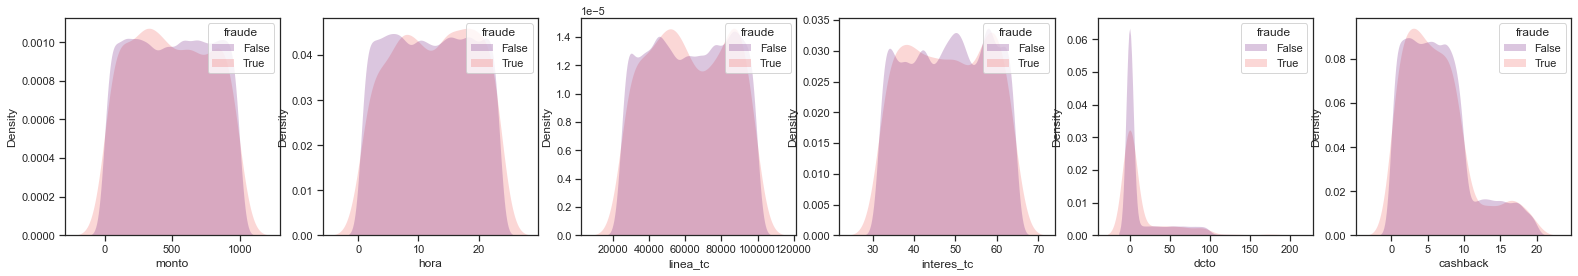

<Figure size 432x288 with 0 Axes>

In [55]:
columns = ['monto', 'hora','linea_tc', 'interes_tc','dcto', 'cashback']
fig, ax = plt.subplots(1, len(columns),figsize=(4.5*len(columns),4))
for i, col in enumerate(columns):
    sns.kdeplot(
       data=df, x=col, hue="fraude",
       fill=True, common_norm=False, palette="magma",
       alpha=.25, linewidth=0,ax=ax[i]
    )
plt.show()
plt.clf()

## Distribuciones para variables categóricas

A continuación presento el análisis de las distribuciones para las variables categóricas. Es de resaltar que el efecto es similar al visto para las variables numéricas. Las distribuciones entre transicciones fraudulentas y no fraudulentas se sobrelapan. Algunas tendencias se pueden  observar, como una preferencia por las transacciones físicas y una proporción mayor de hombres que realizan tansacciones. El resto de variables estan distribuidas de forma equitativa entre sus posibles valores.  

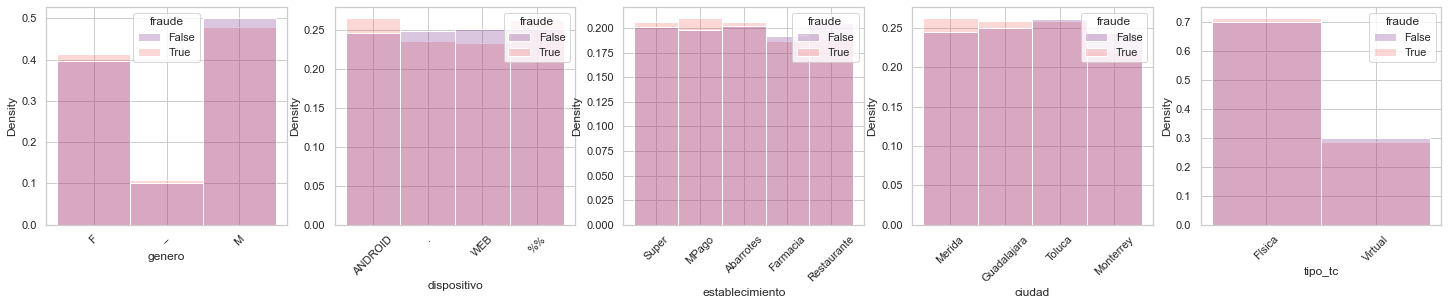

<Figure size 432x288 with 0 Axes>

In [81]:
columns = ['genero','dispositivo','establecimiento','ciudad','tipo_tc']
fig, ax = plt.subplots(1, len(columns),figsize=(5*len(columns),4))
for i, col in enumerate(columns):
    sns.histplot(df,
        x=col, hue="fraude",common_norm=False,stat="density", palette="magma",alpha=0.25,ax=ax[i])

for axi in ax:
    for tick in axi.get_xticklabels():
        tick.set_rotation(45)
plt.show()
plt.clf()

## Distribuciones multiples

A pesar de que las distribuciones individuales no nos arrojan tendencias ni carácterísticas especiales de las transacciones fraudulentas, es importante ver las distribuciones con varias variables para ver si es podemos ver algunas relaciones intersantes. Para esto vamos a usar dos insigths, los violin plots y los density plots.

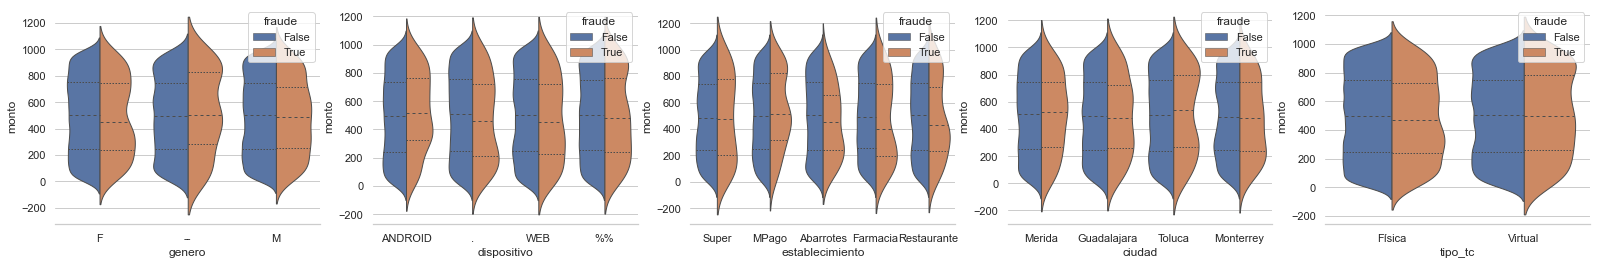

<Figure size 432x288 with 0 Axes>

In [87]:
columns = ['genero','dispositivo','establecimiento','ciudad','tipo_tc']
fig, ax = plt.subplots(1, len(columns),figsize=(5.5*len(columns),4))
for i, col in enumerate(columns):
    sns.violinplot(data=df, x=col, y="monto", hue="fraude",
                   split=True, inner="quart", linewidth=1,ax=ax[i])
    sns.despine(left=True)

plt.show()
plt.clf()

Lo que notamos es esas relaciones practicamente identicas entre las distribuciones de transacciones fraudulentas y las no fraudulentes. Algo de resaltar es que el monto de las transacciones fraudulentas virtuales tienen una pequeña tendencia a ser más grandes que las transacciones fraudulentas físicas, esto podría ser importante para las deciones de seguridad en estas transacciones. De igual manera, las transacciones que no registran genero y son fraudulentas tienen pequeñas tendecias a ser mayores. Además de los mencionado anteriormente no evidencian alguna otra relación que pueda ser de nuestra importancia.

In [16]:
df_0 = df[df.fraude == False]
df_1 = df[df.fraude == True]

Los density plots siguientes aunque no son completamente identicos si muestran distribuciones muy simliares, pero sin ninguna tendecia privilegiada. 

### Para transacciones no fraudulentas

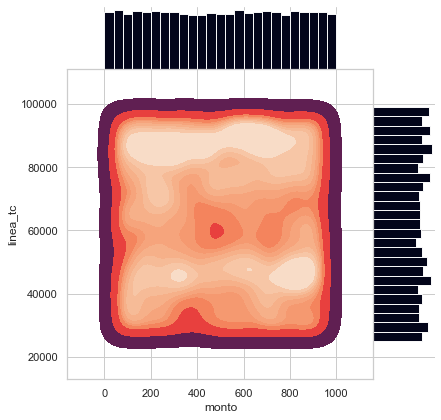

In [83]:
g = sns.JointGrid(data=df_0, x="monto", y="linea_tc", space=0)
g.plot_joint(sns.kdeplot, cmap="rocket",fill=True)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

### Para transacciones fraudulentas

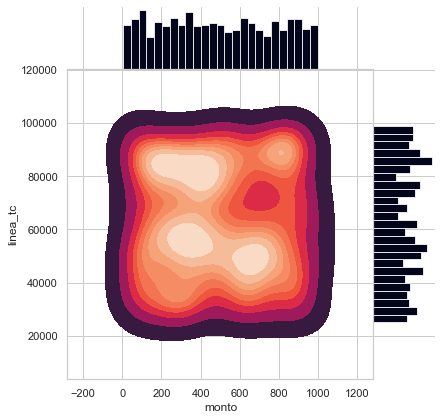

In [20]:
g = sns.JointGrid(data=df_1, x="monto", y="linea_tc", space=0)
g.plot_joint(sns.kdeplot, cmap="rocket",fill=True)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

### Kullback-Leibler Divergence

Adicionalmente para ver la similaridad entre las distribuciones marginales para las transacciones fraudulentas y no fraudulentas podemos usar el criterio de Kullback-Leibler Divergence. Este criterio nos permite decir si dos distribuciones son iguales. Si el valor de este criterio es 0 las disitrbuciones son iguales, entre mayor sea el valor, las distribuciones son diferentes

In [134]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

def histogram(df,columns):
    dist = []
    for col in columns:
        dist.append(df[col].value_counts(normalize=True).values)
    
    return dist
hist_0 = histogram(df_0,['genero','dispositivo','establecimiento','ciudad','tipo_tc'])
hist_1 = histogram(df_1,['genero','dispositivo','establecimiento','ciudad','tipo_tc'])

print([KL(i,j) for i,j in zip(hist_0,hist_1)])

[0.0010959701428510495, 0.0066051346620638295, 0.0005058410048435335, 0.0017352904083949468, 0.0005098936528095]


/var/folders/tk/y0zzmv3s5sq7t33gwsx2mhjm0000gn/T/ipykernel_12713/248812699.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(a, dtype=np.float)
/var/folders/tk/y0zzmv3s5sq7t33gwsx2mhjm0000gn/T/ipykernel_12713/248812699.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.asarray(b, dtype=np.float)


Lo que encontramos es valores muy cercanos a cero, lo que definitivamente nos dice que las disitrbuciones son casi iguales. El problema principal de tener esto es que entrenar un modelo de machine learning que diferencia entre una transacción fraudulenta o no es muy dificil y en general no hay evidencia de que con estas features podamos dicernir entre los dos tipos de transacciones. Adicionalmente se podría calcular las disitribuciones conjuntas y el criterio  Kullback-Leibler Divergence, pero debido a los resultados encontrados es de inturise que se encontraran resultados simliares.

In [143]:
from sklearn.cluster import KMeans

# Categorización de clientes

La categorización que a continuación presento es basado en un kmeans, debido a que particularmente no tengo un criterio para se parar los clientes entonces prefiero que las caratcerísticas mismas separen a los clientes. Solo uso las variables numéricas para esto por practicidad. Sin ningun cirterio haré 5 categorías de clientes pero se podría usar algún criterio como gap statistics o alguno otro del estado del arte para encontrar un número optimo de categorias.

In [151]:
df_clientes = df.groupby("ID_USER").sum().reset_index()

In [157]:
n_clientes = 5
kmeans = KMeans(n_clusters=n_clientes, random_state=0).fit(df_clientes.drop(["ID_USER","is_prime"],axis=1).values)
df_clientes["categoria"] = kmeans.labels_

In [158]:
df_clientes.head()

ID_USER        monto  hora  linea_tc  interes_tc  is_prime        dcto  \
0        0   697.064876    27    142000         102         0   60.834563   
1        1  3416.796066    53    658000         392         0  124.631382   
2        2  2789.893416    78    385000         399         0  274.956580   
3        3   477.972148    31    124000          68         0    0.000000   
4        4   277.176524     6     83000          37         0   55.435305   

    cashback  fraude  categoria  
0   7.249496       0          0  
1  49.028204       0          1  
2  28.644970       0          2  
3   4.779721       0          0  
4   2.217412       0          0

Adicionalmente presento unos insights por si se desea ver las características relevantes de los clientes de cada categoría. A primera vista paraceria una partición de valores altos medios y bajos en las caracteríticas como se evidencia en `monto`, `linea_tc` y `cash_back`. Pero para otras caracteríticas paracen ser relaciones mas complejas.

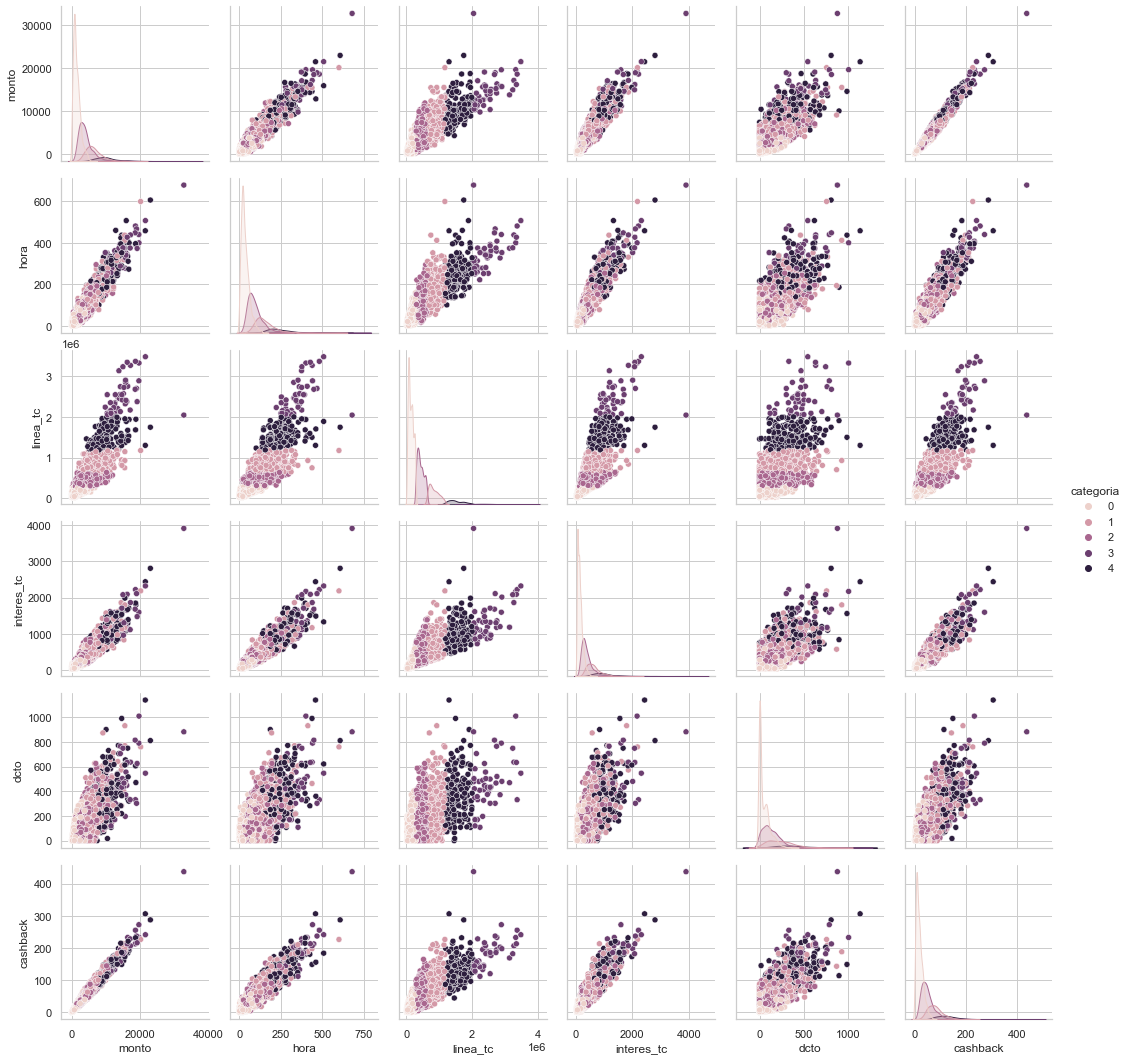

In [160]:
sns.pairplot(df_clientes.drop(["ID_USER","fraude","is_prime"],axis=1), hue="categoria")